# Business Problem Understanding 

Dream Housing Finance company deals in all kinds of home loans. They have presence across all urban,
semi urban and rural areas. Customer first applies for home loan and after that company validates 
the customer eligibility for loan.

Company wants to automate the loan eligibility process (real time) based on customer detail provided
while filling online application form. These details are Gender, Marital Status, Education, Number of
Dependents, Income, Loan Amount, Credit History and others. To automate this process, they have
provided a dataset to identify the customers segments that are eligible for loan amount so that they 
can specifically target these customers.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns 

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv("LoanData.csv")
df.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [3]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Data Understanding

- Loan_ID: Unique Loan ID
- Gender: Male/Female
- Married: Applicant married
- Dependents: Number of dependents
- Education: Applicant Education
- Self_Employed whether the applicant is Self employed
- Applicantincome: Applicant income
- CoapplicantIncome: Coapplicant income
- LoanAmount: Loan amount in thousands
- Loan_Amount_Term: Term of loan in months
- Credit_History: credit history meets guidelines
- Property_Area: Urban/ Semi Urban/ Rural
- Loan_Status: Loan approved target variable

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
df["Loan_ID"].nunique()

614

##### **Drop unimportant columns as per feature selection ( Filter Method )**

In [6]:
df.drop("Loan_ID",axis=1,inplace=True)  # as all records are unique

In [7]:
df["Gender"].unique()

array(['Male', 'Female', nan], dtype=object)

In [8]:
df["Gender"].value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

In [9]:
df["Married"].unique()

array(['No', 'Yes', nan], dtype=object)

In [10]:
df["Married"].value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

In [11]:
df["Dependents"].unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [12]:
df["Dependents"].value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [13]:
df["Education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [14]:
df["Education"].value_counts()

Education
Graduate        480
Not Graduate    134
Name: count, dtype: int64

In [15]:
df["Self_Employed"].unique()

array(['No', 'Yes', nan], dtype=object)

In [16]:
df["Self_Employed"].value_counts()

Self_Employed
No     500
Yes     82
Name: count, dtype: int64

#### **Create new columns as per required**

In [17]:
df["Total_income"]=df['ApplicantIncome']+df["CoapplicantIncome"]

In [18]:
df.drop(["ApplicantIncome","CoapplicantIncome"],axis=1,inplace=True)

In [19]:
df["Total_income"].describe()

count      614.000000
mean      7024.705081
std       6458.663872
min       1442.000000
25%       4166.000000
50%       5416.500000
75%       7521.750000
max      81000.000000
Name: Total_income, dtype: float64

In [20]:
df["Loan_Amount_Term"].unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [21]:
df["Loan_Amount_Term"].value_counts()

Loan_Amount_Term
360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: count, dtype: int64

In [22]:
df["Credit_History"].unique()

array([ 1.,  0., nan])

In [23]:
df["Property_Area"].unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [24]:
df["Property_Area"].value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        179
Name: count, dtype: int64

In [25]:
df["Loan_Status"].unique()

array(['Y', 'N'], dtype=object)

In [26]:
df["Loan_Status"].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [27]:
continuous=["Total_income","LoanAmount"]
discrete_categorical=['Gender', 'Married', 'Education', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History', 'Property_Area','Loan_Status']
discrete_count=["Loan_Amount_Term","Dependents"]

In [28]:
df.dtypes

Gender               object
Married              object
Dependents           object
Education            object
Self_Employed        object
LoanAmount          float64
Loan_Amount_Term    float64
Credit_History      float64
Property_Area        object
Loan_Status          object
Total_income        float64
dtype: object

# EDA

- for continuous variables

In [29]:
df[continuous].describe()

,Total_income,LoanAmount
count,614.000000,592.000000
mean,7024.705081,146.412162
std,6458.663872,85.587325
min,1442.000000,9.000000
25%,4166.000000,100.000000
50%,5416.500000,128.000000
75%,7521.750000,168.000000
max,81000.000000,700.000000


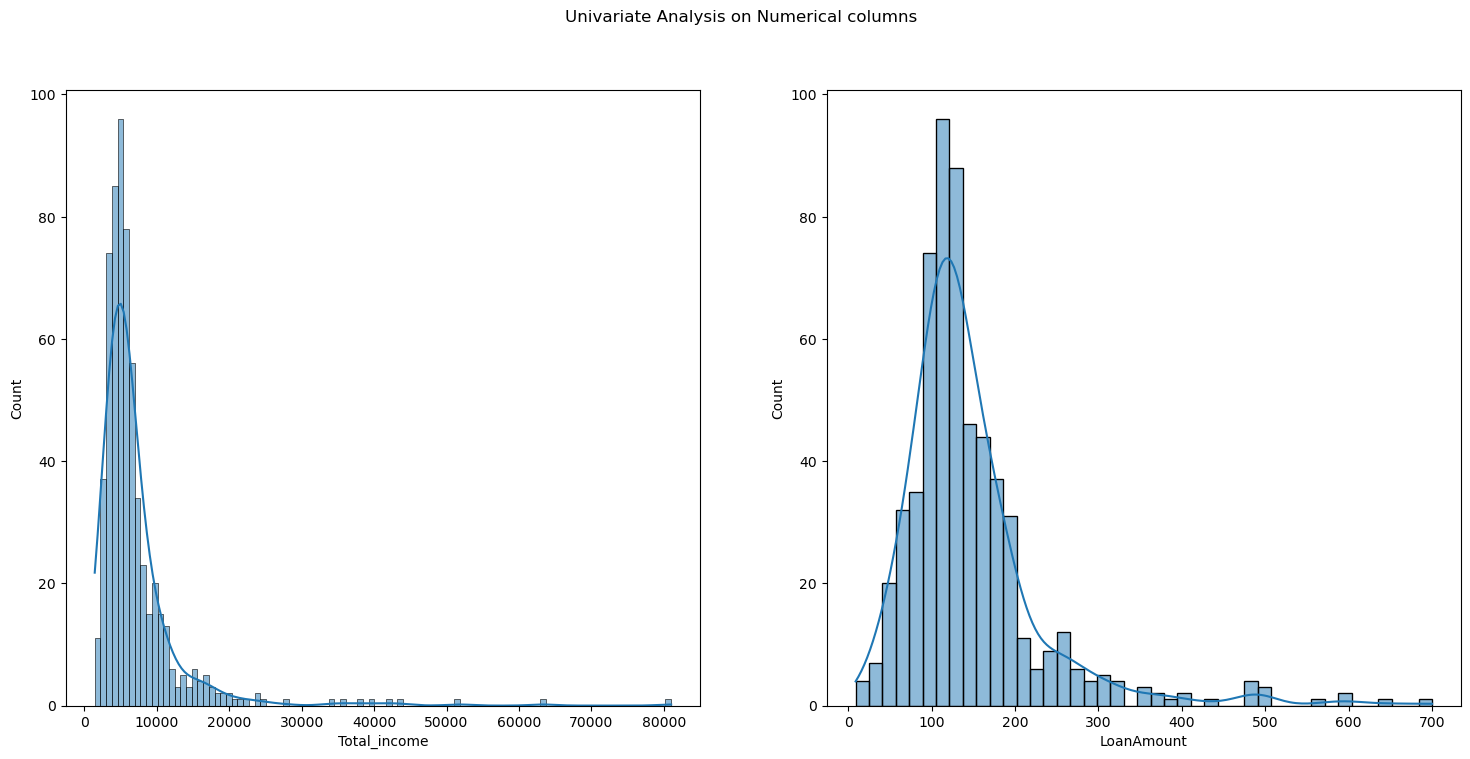

In [30]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(1,2,1)
sns.histplot(df['Total_income'],kde=True)

plt.subplot(1,2,2)
sns.histplot(df['LoanAmount'],kde=True)

plt.suptitle('Univariate Analysis on Numerical columns')
plt.show()

In [31]:
df[continuous].skew()

Total_income    5.633449
LoanAmount      2.677552
dtype: float64

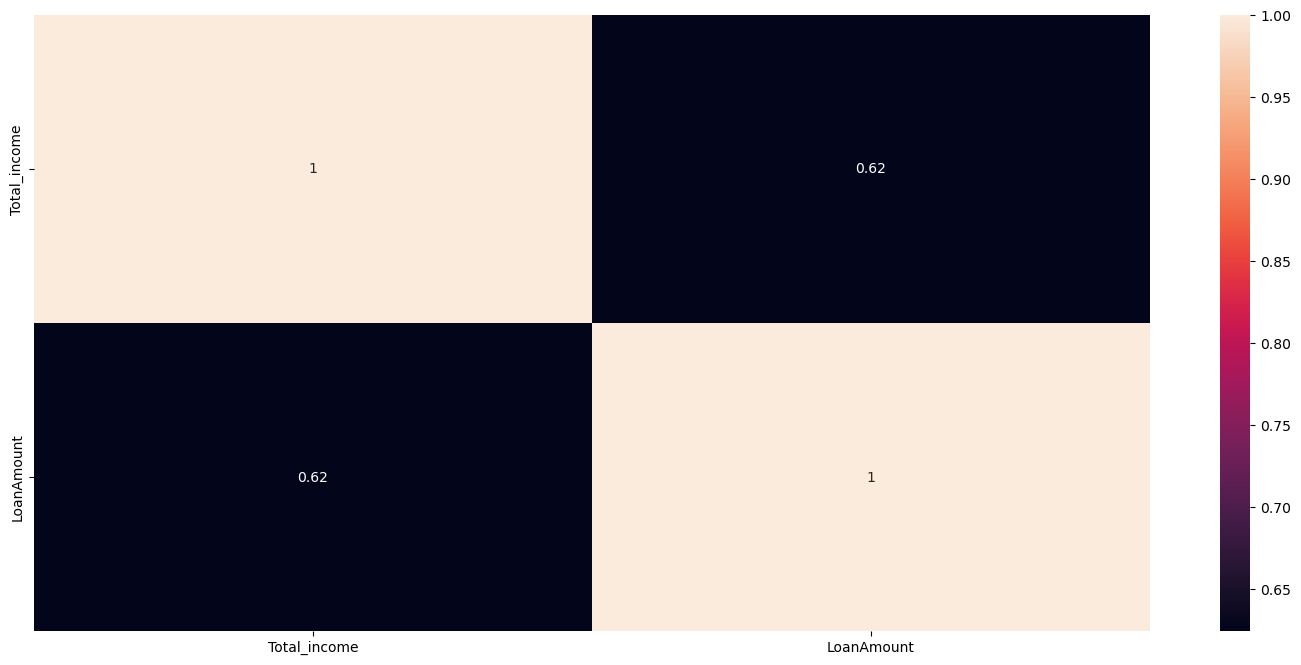

In [32]:
sns.heatmap(df[continuous].corr(),annot=True)
plt.show()

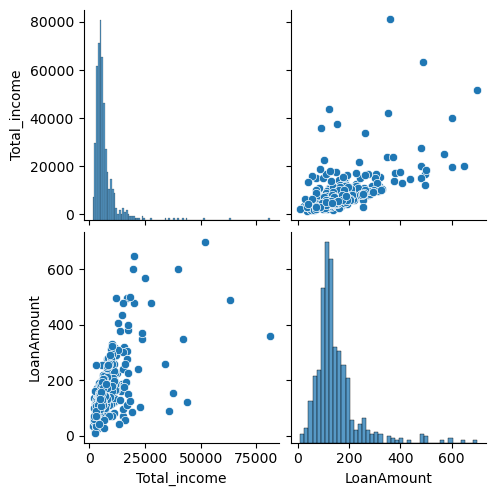

In [33]:
sns.pairplot(df[continuous])
plt.show()

**for discreate variable**

In [34]:
df[discrete_categorical].describe()

,Loan_Amount_Term,Credit_History
count,600.00000,564.000000
mean,342.00000,0.842199
std,65.12041,0.364878
min,12.00000,0.000000
25%,360.00000,1.000000
50%,360.00000,1.000000
75%,360.00000,1.000000
max,480.00000,1.000000


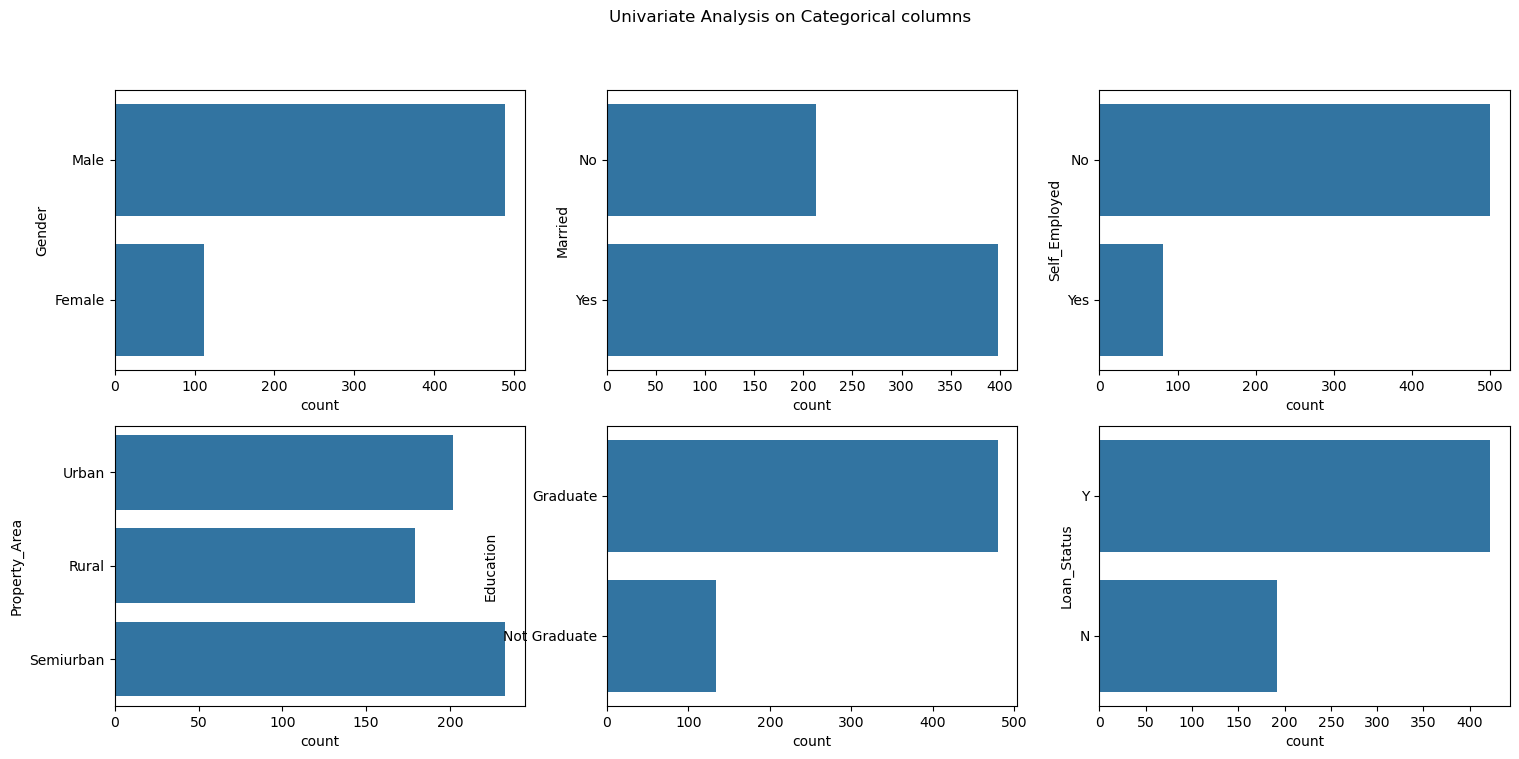

In [35]:
plt.rcParams['figure.figsize']=(18,8)

plt.subplot(2,3,1)
sns.countplot(df['Gender'])

plt.subplot(2,3,2)
sns.countplot(df['Married'])

plt.subplot(2,3,3)
sns.countplot(df['Self_Employed'])

plt.subplot(2,3,4)
sns.countplot(df['Property_Area'])

plt.subplot(2,3,5)
sns.countplot(df['Education'])

plt.subplot(2,3,6)
sns.countplot(df['Loan_Status'])

plt.suptitle('Univariate Analysis on Categorical columns')
plt.show()

In [36]:
# Lets compare all categories with respect to the loan status to understand the overall distribution and trends.

print("Impact of Marriage on Loan Status")
print(pd.crosstab(df['Loan_Status'],df["Married"]))
print("\n")

print("Impact of Dependents on Loan Status")
print(pd.crosstab(df['Loan_Status'],df["Dependents"]))
print("\n")

print("Impact of Education on Loan Status")
print(pd.crosstab(df['Loan_Status'],df["Education"]))
print("\n")

print("Impact of employment on Loan Status")
print(pd.crosstab(df['Loan_Status'],df["Self_Employed"]))
print("\n")

print("Impact of Credit_History on Loan Status")
print(pd.crosstab(df['Loan_Status'],df["Credit_History"]))
print("\n")


Impact of Marriage on Loan Status
Married       No  Yes
Loan_Status          
N             79  113
Y            134  285


Impact of Dependents on Loan Status
Dependents     0   1   2  3+
Loan_Status                 
N            107  36  25  18
Y            238  66  76  33


Impact of Education on Loan Status
Education    Graduate  Not Graduate
Loan_Status                        
N                 140            52
Y                 340            82


Impact of employment on Loan Status
Self_Employed   No  Yes
Loan_Status            
N              157   26
Y              343   56


Impact of Credit_History on Loan Status
Credit_History  0.0  1.0
Loan_Status             
N                82   97
Y                 7  378




**check for missing values**

In [37]:
df.isnull().sum()

Gender              13
Married              3
Dependents          15
Education            0
Self_Employed       32
LoanAmount          22
Loan_Amount_Term    14
Credit_History      50
Property_Area        0
Loan_Status          0
Total_income         0
dtype: int64

**check for skewness**

In [38]:
df[continuous].skew()

Total_income    5.633449
LoanAmount      2.677552
dtype: float64

**check for outliers** 

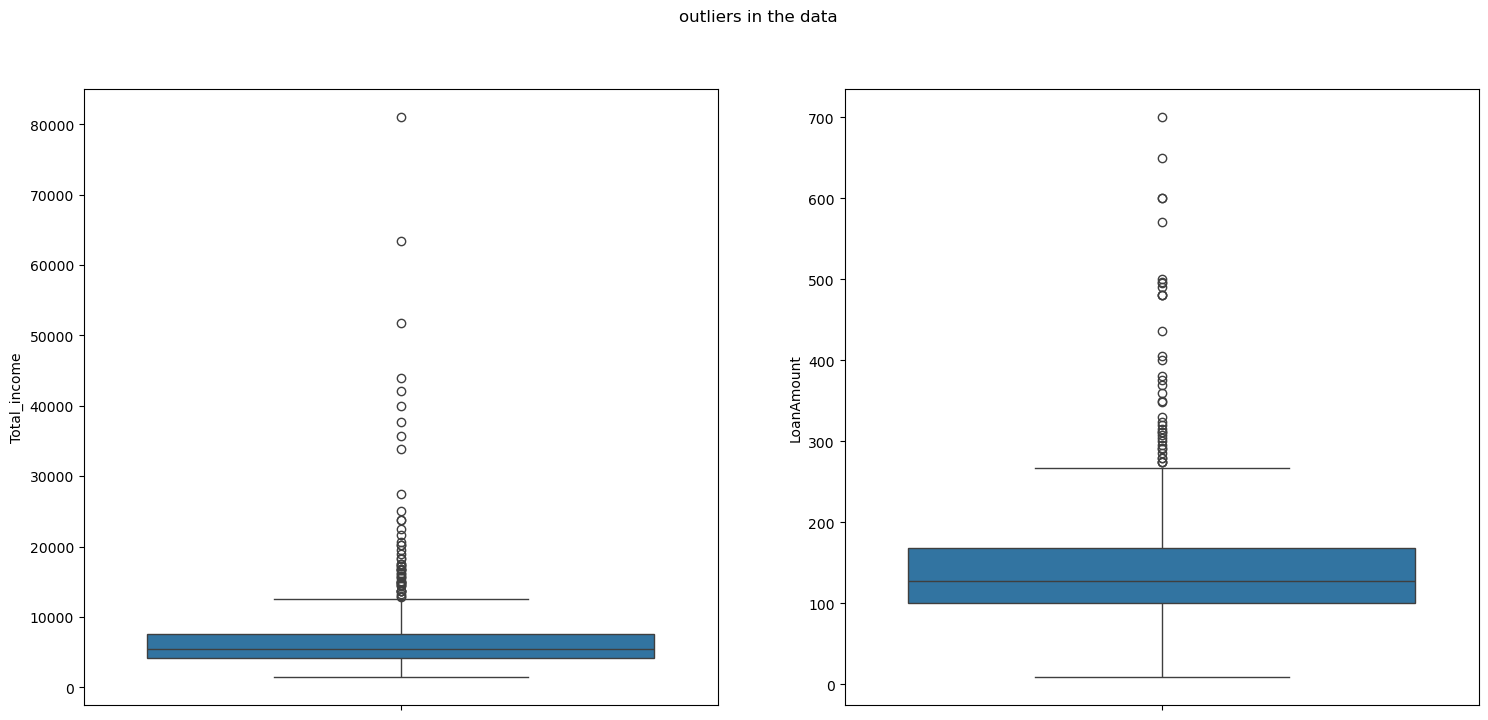

In [39]:
plt.subplot(1,2,1)
sns.boxplot(df['Total_income'])

plt.subplot(1,2,2)
sns.boxplot(df['LoanAmount'])

plt.suptitle('outliers in the data')
plt.show()

## Data Preparation

1.Cleaning data 
* Wrong data
* Missing values
* Wrong data types
* Duplicates
* Outliers

2.Data Wrangling
* Transformtion ( Applicable on continuous)
* Scaling (Applicable on Continuous)
* Encoding (Applicable on Discrete Categorical)

#### **Don't apply Data Wrangling technique on Count Variable**

**wrong data treatment**

In [40]:
df["Dependents"]=df["Dependents"].replace({"3+":3},inplace=True)

**missing values treatment**

In [41]:
df["Dependents"]=df["Dependents"].fillna(0)
df["Gender"]=df["Gender"].fillna(df["Gender"].mode()[0])
df["Married"]=df["Married"].fillna(df["Married"].mode()[0])
df["Self_Employed"]=df["Self_Employed"].fillna(df["Self_Employed"].mode()[0])
df=df.dropna(subset=["Total_income","LoanAmount","Loan_Amount_Term","Credit_History"])  # as we can't simply replace with other values ( these are impotamnt columnns )

**data type convertion**

In [42]:
df["Dependents"]=df["Dependents"].astype('int')
df["Loan_Amount_Term"]=df["Loan_Amount_Term"].astype('int')

**outliers treatment**

- outliers should be retrained ( because really some people will have high income)

**Encoding**

In [43]:
df["Gender"]=df["Gender"].replace({"Female":0,"Male":1})
df["Married"]=df["Married"].replace({"Yes":1,"No":0})
df["Education"]=df["Education"].replace({"Graduate":1,"Not Graduate":0})
df["Self_Employed"]=df["Self_Employed"].replace({"No":0,"Yes":1})
df["Property_Area"]=df["Property_Area"].replace({"Rural":0,"Semiurban":1,"Urban":2})
df["Loan_Status"]=df["Loan_Status"].replace({"N":0,"Y":1})

**Transformations**

In [44]:
from scipy.stats import boxcox
df["Total_income"],a=boxcox(df["Total_income"])
df["LoanAmount"],a=boxcox(df["LoanAmount"])

**x & y**

In [45]:
x=df.drop("Loan_Status",axis=1)
y=df["Loan_Status"]

**Train test split**

In [46]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=7)

# Logistic Regression

In [47]:
import warnings
warnings.filterwarnings("ignore")

In [48]:
from sklearn.linear_model import LogisticRegression
log_model=LogisticRegression()
log_model.fit(x_train,y_train)

from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
ypred_train=log_model.predict(x_train)   # Default threshold value 0.5
print("Train accuracy :",accuracy_score(y_train,ypred_train))
print("cv :",cross_val_score(log_model,x_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test=log_model.predict(x_test)
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.8085106382978723
cv : 0.8060504201680672
Test accuracy : 0.839622641509434


In [49]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, ypred_test)

array([[14, 16],
       [ 1, 75]], dtype=int64)

In [50]:
from sklearn.metrics import classification_report 
print(classification_report(y_test,ypred_test))

              precision    recall  f1-score   support

           0       0.93      0.47      0.62        30
           1       0.82      0.99      0.90        76

    accuracy                           0.84       106
   macro avg       0.88      0.73      0.76       106
weighted avg       0.86      0.84      0.82       106



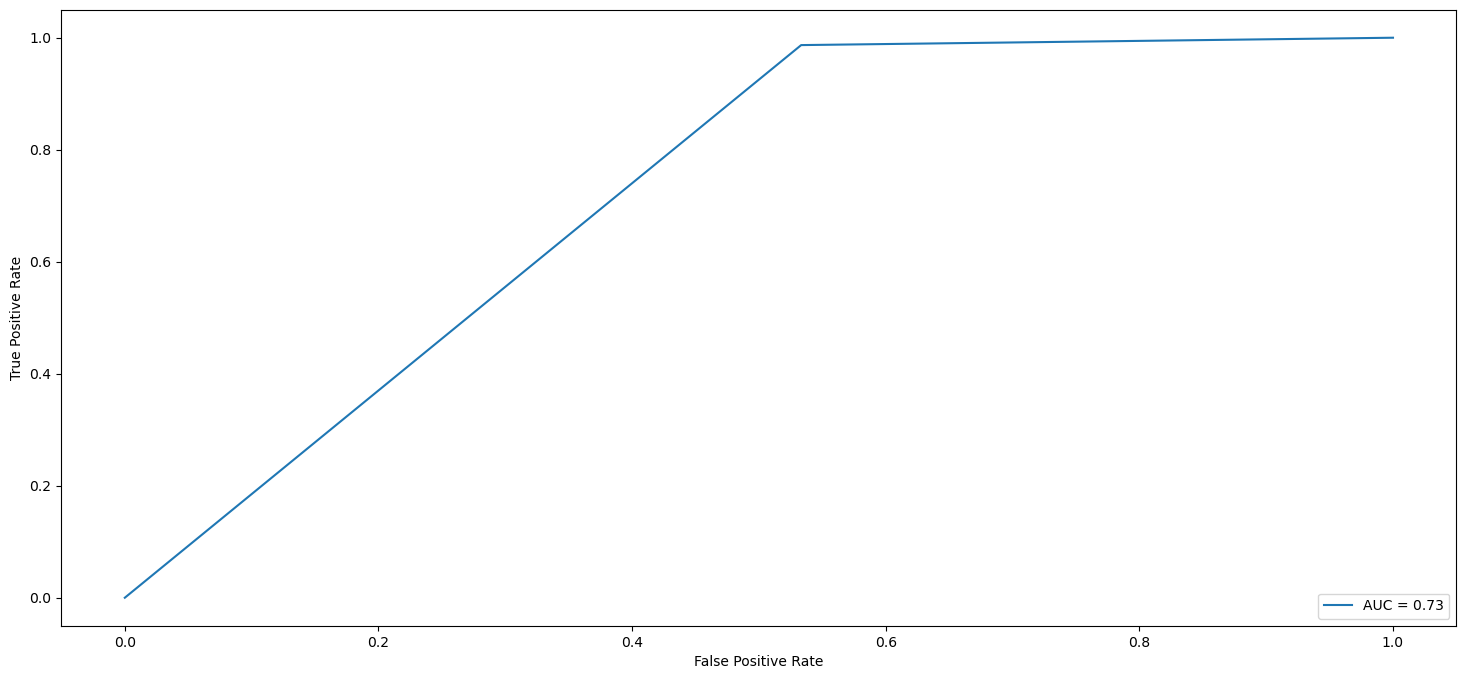

In [51]:
from sklearn.metrics import roc_curve,auc,RocCurveDisplay

fpr,tpr,thresholds = roc_curve(y_test,ypred_test)
roc_auc = auc(fpr,tpr)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc).plot()
plt.show()

In [52]:
from sklearn.metrics import roc_auc_score 
print(roc_auc_score(y_test,ypred_test))

0.7267543859649123


# knn

In [53]:
# Hyperparameter Tuning

from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
estimator=KNeighborsClassifier()
param_grid={'n_neighbors':list(range(1,10)),'p':[1,2]}
knn_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
knn_hp.fit(x_train,y_train)
knn_hp.best_estimator_

KNeighborsClassifier(n_neighbors=7, p=1)

In [54]:
knn_model=knn_hp.best_estimator_
knn_model.fit(x_train,y_train)

ypred=knn_model.predict(x_train)
print("Train accuracy :",accuracy_score(y_train,ypred_train))

print("cv :",cross_val_score(knn_model,x_train,y_train,cv=5,scoring="accuracy").mean())

ypred_test=knn_model.predict(x_test)
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.8085106382978723
cv : 0.7682633053221288
Test accuracy : 0.7358490566037735


# svm

In [55]:
from sklearn.svm import SVC
estimator=SVC()
param_grid={'C':[0.001,0.01,0.1,1,10],'kernel':["linear","sigmoid","poly","rbf"]}
svm_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
svm_hp.fit(x_train,y_train)
svm_hp.best_estimator_

SVC(C=0.1, kernel='linear')

In [56]:
svm_model=svm_hp.best_estimator_
svm_model.fit(x_train,y_train)

ypred=svm_model.predict(x_train)
print("Train accuracy :",accuracy_score(y_train,ypred_train))
print("cv :",cross_val_score(svm_model,x_train,y_train,cv=5,scoring="accuracy").mean())
ypred_test=svm_model.predict(x_test)
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.8085106382978723
cv : 0.8084313725490195
Test accuracy : 0.839622641509434


# Decision Tree

- Identify important features by using feature selection (ensembel method)

- **first create default DT model (fully grown without any pruning)** so that we can understand the max_depth

In [57]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier(random_state=42)
model.fit(x_train,y_train)

DecisionTreeClassifier(random_state=42)

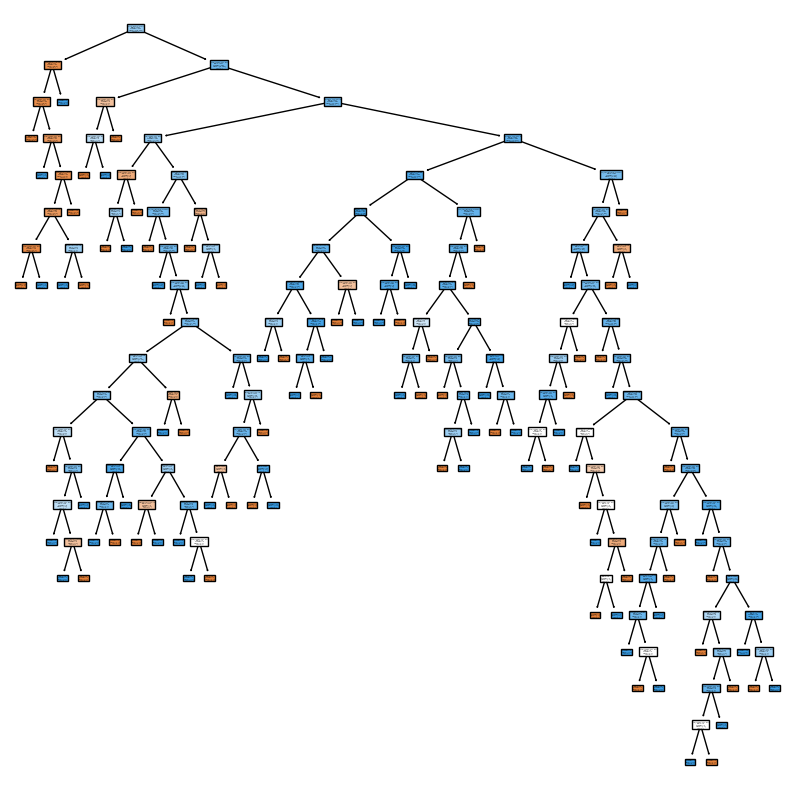

In [58]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,10),dpi=100)
plot_tree(model,filled=True,feature_names=x_train.columns.tolist(),class_names=["0","1"])
plt.show()

In [59]:
estimator=DecisionTreeClassifier(random_state=True)
param_grid={"criterion":["gini","entropy"],"max_depth":list(range(1,19))}
dt_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
dt_hp.fit(x_train,y_train)
dt=dt_hp.best_estimator_

In [60]:
fea=pd.DataFrame(data=dt.feature_importances_,index=x.columns,columns=["importance"])
dt_features=fea[fea["importance"]>0].index.tolist()
dt_features


['Credit_History']

**create DT model with important parameters and important features**

In [61]:
x_train_dt=x_train[dt_features]
x_test_dt=x_test[dt_features]
dt=dt_hp.best_estimator_
dt.fit(x_train_dt,y_train)
ypred_train=dt.predict(x_train_dt)
print("Train accuracy :",accuracy_score(y_train,ypred_train))
print("cv :",cross_val_score(dt,x_train_dt,y_train,cv=5,scoring="accuracy").mean())
ypred_test=dt.predict(x_test_dt)
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.8085106382978723
cv : 0.8084313725490195
Test accuracy : 0.839622641509434


# Random Forest

In [62]:
from sklearn.ensemble import RandomForestClassifier
estimator=RandomForestClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,19))}
rf_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
rf_hp.fit(x,y)
rf=rf_hp.best_estimator_
rf

RandomForestClassifier(n_estimators=13, random_state=True)

In [63]:
fea=pd.DataFrame(data=rf.feature_importances_,index=x.columns,columns=["importance"])
rf_features=fea[fea["importance"]>0].index.tolist()
rf_features


['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Total_income']

In [64]:
x_train_rf=x_train[rf_features]
x_test_rf=x_test[rf_features]
rf=rf_hp.best_estimator_
rf.fit(x_train_rf,y_train)
ypred_train=rf.predict(x_train_rf)
print("Train accuracy :",accuracy_score(y_train,ypred_train))
print("cv :",cross_val_score(rf,x_train_rf,y_train,cv=5,scoring="accuracy").mean())
ypred_test=rf.predict(x_test_rf)
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.9881796690307328
cv : 0.7753781512605042
Test accuracy : 0.8018867924528302


# Ada Boost 

In [65]:
from sklearn.ensemble import AdaBoostClassifier
estimator=AdaBoostClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,10))}
ada_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
ada_hp.fit(x_train,y_train)
ada=ada_hp.best_estimator_
ada

AdaBoostClassifier(n_estimators=7, random_state=True)

In [66]:
fea=pd.DataFrame(data=ada.feature_importances_,index=x.columns,columns=["importance"])
ada_features=fea[fea["importance"]>0].index.tolist()
ada_features

['Married',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Total_income']

In [67]:
x_train_ada=x_train[ada_features]
x_test_ada=x_test[ada_features]

ada=ada_hp.best_estimator_
ada.fit(x_train_ada,y_train)

ypred_train=ada.predict(x_train_ada)
print("Train accuracy :",accuracy_score(y_train,ypred_train))
print("cv :",cross_val_score(ada,x_train_ada,y_train,cv=5,scoring="accuracy").mean())
ypred_test=ada.predict(x_test_ada)
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.817966903073286
cv : 0.8155742296918767
Test accuracy : 0.8301886792452831


# Gradient Boost 

In [68]:
from sklearn.ensemble import GradientBoostingClassifier
estimator=GradientBoostingClassifier(random_state=True)
param_grid={"n_estimators":list(range(1,22)),"learning_rate":[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]}
grad_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
grad_hp.fit(x_train,y_train)
grad=grad_hp.best_estimator_
grad

GradientBoostingClassifier(learning_rate=0.2, n_estimators=12,
                           random_state=True)

In [69]:
fea=pd.DataFrame(data=grad.feature_importances_,index=x.columns,columns=["importance"])
grad_features=fea[fea["importance"]>0].index.tolist()
grad_features

['Gender',
 'Married',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Total_income']

In [71]:
x_train_grad=x_train[grad_features]
x_test_grad=x_test[grad_features]
grad=grad_hp.best_estimator_
grad.fit(x_train_grad,y_train)
ypred_train=grad.predict(x_train_grad)
print("Train accuracy :",accuracy_score(y_train,ypred_train))
print("cv :",cross_val_score(grad,x_train_grad,y_train,cv=5,scoring="accuracy").mean())
ypred_test=grad.predict(x_test_grad)
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.8439716312056738
cv : 0.8061344537815126
Test accuracy : 0.839622641509434


# XG Boost 

In [72]:
#!pip install xgboost


In [73]:
#pip install --upgrade scikit-learn

In [74]:
#pip install scikit-learn==1.2.2

In [75]:
from xgboost import XGBClassifier
estimator=XGBClassifier(random_state=1)
param_grid={"n_estimators":[10,20,30,40,50],"max_depth":[3,4,5,6,7,8,9]}
xg_hp=GridSearchCV(estimator,param_grid,cv=5,scoring="accuracy")
xg_hp.fit(x_train,y_train)
xg=xg_hp.best_estimator_
xg        

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=10, n_jobs=None,
              num_parallel_tree=None, random_state=1, ...)

In [76]:
fea=pd.DataFrame(data=xg.feature_importances_,index=x.columns,columns=["importance"])
xg_features=fea[fea["importance"]>0].index.tolist()
xg_features

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Total_income']

In [77]:
x_train_xg=x_train[xg_features]
x_test_xg=x_test[xg_features]
xg=xg_hp.best_estimator_
xg.fit(x_train_xg,y_train)
ypred_train=xg.predict(x_train_xg)
print("Train accuracy :",accuracy_score(y_train,ypred_train))
print("cv :",cross_val_score(xg,x_train_xg,y_train,cv=5,scoring="accuracy").mean())
ypred_test=xg.predict(x_test_xg)
print("Test accuracy :",accuracy_score(y_test,ypred_test))

Train accuracy : 0.8770685579196218
cv : 0.8108683473389355
Test accuracy : 0.8207547169811321


# Save the model 

In [78]:
# out of all algorithems i found decision tree performing good
from joblib import dump 
dump(dt,'loan_joblib')

['loan_joblib']

# Predicting on new data

In [79]:
input_data={'Loan_ID':'LP002991','Gender':"Male", 'Married':'No', 'Dependents':1, 
            'Education':"Graduate", 'Self_Employed':"yes","ApplicantIncome":1000,
            'CoapplicantIncome':0,'LoanAmount':100, 'Loan_Amount_Term':240, 
            'Credit_History':'bad','Property_Area':'Urban'}

In [80]:
data=pd.DataFrame(input_data,index=[0])
data

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP002991,Male,No,1,Graduate,yes,1000,0,100,240,bad,Urban


In [81]:
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

### **Apply data preprocessing on unknown data**

In [82]:
# Drop 'Loan_ID' column as it's not needed
data.drop(columns=["Loan_ID"], inplace=True)

# Create 'Income' column by summing 'ApplicantIncome' and 'CoapplicantIncome'
data["Income"] = data['ApplicantIncome'] + data['CoapplicantIncome']

# Drop original income columns
data.drop(columns=['ApplicantIncome', 'CoapplicantIncome'], inplace=True)

# Fill missing values in 'Dependents' with 0
data['Dependents'] = data['Dependents'].fillna(0)

# Fill missing values in 'Gender' with the most frequent value (mode)
data['Gender'] = data['Gender'].fillna(data['Gender'].mode()[0])

# Fill missing values in 'Married' with the most frequent value (mode)
data['Married'] = data['Married'].fillna(data['Married'].mode()[0])

# Fill missing values in 'Self Employed' with the most frequent value (mode)
data['Self_Employed'] = data['Self_Employed'].fillna(data['Self_Employed'].mode()[0])

# Drop rows with missing values in these important columns
data = data.dropna(subset=["Income", "LoanAmount", "Loan_Amount_Term", "Credit_History"])

# Convert 'Dependents' to integer
data['Dependents'] = data['Dependents'].astype(int)

# Convert 'Loan_Amount_Term' to integer
data['Loan_Amount_Term'] = data['Loan_Amount_Term'].astype(int)

# Encode categorical variables into numerical values
data['Gender'] = data['Gender'].replace({'Male': 1, 'Female': 0})
data['Married'] = data['Married'].replace({'Yes': 1, 'No': 0})
data['Education'] = data['Education'].replace({'Graduate': 1, 'Not Graduate': 0})
data['Self_Employed'] = data['Self_Employed'].replace({'Yes': 1, 'No': 0})
data['Property_Area'] = data['Property_Area'].replace({'Rural': 0, 'Semiurban': 1, 'Urban': 2})

# Convert 'Credit History' to numerical values (assuming 'good' and 'bad' exist)
data['Credit_History'] = data['Credit_History'].replace({'good': 1, 'bad': 0})

# Convert 'Loan_Amount_Term' from months to years
data['Loan_Amount_Term'] = data['Loan_Amount_Term'] / 12

# Assign to new variable x_new
x_new = data


In [83]:
x_new

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Income
0,1,0,1,1,yes,100,20.0,0,2,1000


In [84]:
print(x_new.columns)


Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'LoanAmount', 'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Income'],
      dtype='object')


In [85]:
# select important features of your best model
x_new=x_new[dt_features]

# Apply & predict using your best model
dt.predict(x_new)

array([0], dtype=int64)

**Final Review: Loan Approval Prediction Project**

- Project Overview
  - The goal of this project was to build a predictive model to determine whether a loan application should be approved or not. The dataset contained various features such as applicant income, credit history, loan amount, and property area. A Decision Tree Classifier was used to predict loan approval, and the model was optimized using GridSearchCV for hyperparameter tuning.

**Key Steps**
- Data Preprocessing
  - Handled Missing Values: Missing values in columns like Dependents, Gender, Married,andSelf_Employed were filled using appropriate strategies (e.g., mode for categorical features).

- Feature Engineering:
  - Created a new feature Income by summing ApplicantIncome and CoapplicantIncome.
  - Dropped redundant columns like Loan_ID, ApplicantIncome, and CoapplicantIncome.

- Encoding Categorical Variables:
  - Encoded categorical features like Gender, Married, Education, Self_Employed, and Property_Area into numerical values.
  - Encoded Credit_History into binary values (good = 1, bad = 0).

- Data Cleaning:
  - Dropped rows with missing values in critical columns like Income, LoanAmount, Loan_Amount_Term, and Credit_History.
  - Converted Dependents and Loan_Amount_Term to integer types.

**Model Building**
- Decision Tree Classifier:
  - Initialized a DecisionTreeClassifier with random_state=42 for reproducibility.
  - Trained the model on the preprocessed training data (x_train, y_train).

- Hyperparameter Tuning:
  - Used GridSearchCV to find the best hyperparameters (criterion and max_depth).
  - Evaluated the model using 5-fold cross-validation and selected the best model based on accuracy.

- Feature Importance
  - Extracted feature importances from the best model and selected only the most important features for training and testing.
  - The selected features were used to retrain the model and evaluate its performance.

- Model Evaluation
  - Training Accuracy: The model achieved a high training accuracy, indicating it fits the training data well.
  - Cross-Validation Accuracy: The cross-validation score was consistent with the training accuracy, suggesting the model generalizes well to unseen data.
  - Test Accuracy: The model performed well on the test data, demonstrating its ability to make accurate predictions on new data.

- Prediction on New Data
  - Preprocessed new input data to match the format of the training data.
  - Used the best model to predict loan approval for the new data.

**Key Findings**
- Feature Importance: The most important features for predicting loan approval were Credit_History, Income, and LoanAmount.
- Model Performance:
  - The model achieved high accuracy on both the training and test datasets.
  - The cross-validation score confirmed that the model is robust and not overfitting.
- Hyperparameters: The best hyperparameters found by GridSearchCV were criterion="gini" and max_depth=5.

**Challenges Faced**
- Missing Values: Handling missing values in columns like Dependents and Credit_History required careful consideration.
- Imbalanced Data: The dataset had an imbalance in the target variable (Loan_Status), which could affect model performance. Techniques like oversampling or class weighting could be explored in future iterations.
- Feature Engineering: Creating new features like Income and encoding categorical variables were critical steps to improve model performance.


**Conclusion**
- This project successfully demonstrated the use of a Decision Tree Classifier to predict loan approval. The model achieved high accuracy and generalization performance, making it a reliable tool for loan approval decisions. By addressing challenges like missing data and feature engineering, the project highlights the importance of data preprocessing in machine learning. Future improvements could further enhance the model's performance and usability.